In [1]:
import xarray as xr
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
def RMSE_plot(ax_plt,data_plt,reg_sel,TO_PLOT,iplt,v_min,v_max):
    # subplot panel labels
    panel_lett = ['a','b','c','d','e','f',
                 'g','h','i','j','k','l']
    # Palette
    test_pal = ['crimson','cornflower','teal','tangerine','lilac']
    sns.set_palette(sns.xkcd_palette(test_pal),5)
    # Line plot first
    sns.lineplot(data=data_plt,x='lead days',y=TO_PLOT,hue='Model Name',
                 style='type',ax=ax_plt,markers=False,linewidth=3,legend=False if i < 2*no_regions - 1 else 'full')
    # Scatter plot on top
    sns.scatterplot(data=data_plt,x='lead days',y=TO_PLOT,hue='Model Name',style='type',
                             ax=ax_plt,legend=False,s=200)
    # 
    ax_plt.grid()
    ax_plt.set_ylim((v_min,v_max))
    ax_plt.tick_params(axis='x', labelsize=17)
    ax_plt.tick_params(axis='y', labelsize=17)
    if iplt >= ncols*(nrows-1):
        ax_plt.set_xlabel('Lead Time (Weeks)',fontsize=25)
    else:
        ax_plt.set_xlabel(None)
    if np.mod(iplt,ncols)==0:
        ax_plt.set_ylabel('RMSE (10$^6$ km$^2$)',fontsize=25)
    else:
        ax_plt.set_ylabel(None)
    if iplt == 2*no_regions-1:
        ax_plt.legend(bbox_to_anchor=(1.025,1),loc=2,borderaxespad=0,fontsize=18)
                      
    ax_plt.set_title('{lett}) {region}'.format(lett=panel_lett[iplt],region=reg_sel),fontsize=25)
    sns.despine(ax=ax_plt)

In [3]:
def RMSE_ratio_plot(ax_plt,data_plt,reg_sel,TO_PLOT,iplt,v_min,v_max):
    # subplot panel labels
    panel_lett = ['a','b','c','d','e','f',
                 'g','h','i','j','k','l']
    # Palette
    test_pal = ['crimson','cornflower','teal','tangerine','lilac']
    sns.set_palette(sns.xkcd_palette(test_pal),5)
    # Line plot first
    sns.lineplot(data=data_plt,x='lead days',y=TO_PLOT,hue='Model Name',
                 ax=ax_plt,markers=False,linewidth=3,legend=False if i < 2*no_regions - 1 else 'full')
    # Scatter plot on top
    sns.scatterplot(data=data_plt,x='lead days',y=TO_PLOT,hue='Model Name',
                             ax=ax_plt,legend=False,s=200)
    # add horizontal line
    ax_plt.axhline(y=1,xmin=0,xmax=50,color='k',linewidth=4.8)
    ax_plt.grid()
    ax_plt.set_ylim((v_min,v_max))
    ax_plt.tick_params(axis='x', labelsize=17)
    ax_plt.tick_params(axis='y', labelsize=17)
    if iplt >= ncols*(nrows-1):
        ax_plt.set_xlabel('Lead Time (Weeks)',fontsize=25)
    else:
        ax_plt.set_xlabel(None)
    if np.mod(iplt,ncols)==0:
        ax_plt.set_ylabel(r'RMSE($\frac{VRILE}{NO VRILE}$)',fontsize=25)
    else:
        ax_plt.set_ylabel(None)
    if iplt == 2*no_regions-1:
        ax_plt.legend(bbox_to_anchor=(1.025,1),loc=2,borderaxespad=0,fontsize=18)
                      
    ax_plt.set_title('{lett}) {region}'.format(lett=panel_lett[iplt],region=reg_sel),fontsize=25)
    sns.despine(ax=ax_plt)

In [4]:
#model_names = ['ecmwf','metreofr','ukmo','ncep']
ALL_REGIONS = False 
model_names = ['DAMPED_ANOMALY','ecmwf','ukmo','metreofr','ncep']
seas_str = 'ALL'
seas_str2 = 'SON'
seas_sel2 = [9,10,11]
seas_sel = [1,2,3,4,5,6,7,8,9,10,11,12]
vrile_thresh = '05'
clim_freq = 'WEEKLY'
TO_PLOT = 'SIE RMSE'
obs_name = 'NSIDC_0079'

### Steps
1. Load on RMSE spreadsheets for all days and VRILE days, and combine all models into one spreadsheet 
2. Make postage stamp plot for each region comparing all days to VRILE days
3. Plot select regions for paper



Load spreadsheets

In [5]:
d_SIE_all = pd.DataFrame()
d_SIE_all_seas2 = pd.DataFrame()
fpath_load = '/home/disk/sipn/mcmcgraw/McGraw_etal_2020/code/make_it_nice/data/'
for i_model in model_names:
    # Damped anomaly has different filename
    if i_model == 'DAMPED_ANOMALY':
        fpath_all = fpath_load+'{model_name}/'.format(model_name=i_model)
        if obs_name == 'NSIDC_0051':
            fpath_all = fpath_all+'OBS_{obs_name}/'.format(obs_name=obs_name)
        
        fpath_all = fpath_all+'lead_time_WEEKS/VRILE_vs_NOVRILE_RMSE_MAE_{model_name}_months{seas_str}_VRILE{vrile_thresh}_model_clim_freq_{clim_freq}.csv'.format(model_name=i_model,
                                                                                            seas_str=seas_str,
                                                                                            vrile_thresh=vrile_thresh,
                                                                                            clim_freq=clim_freq)
        d_SIE = pd.read_csv(fpath_all)
        print('reaindg ',fpath_all)
        d_SIE['Model Name'] = 'damped anomaly'
        d_SIE_all = d_SIE_all.append(d_SIE)
        ## SAME BUT FOR SEAS2
        fpath_all2 = fpath_load+'{model_name}/'.format(model_name=i_model)
        if obs_name == 'NSIDC_0051':
            fpath_all2 = fpath_all2+'OBS_{obs_name}/'.format(obs_name=obs_name)
        fpath_all2 = fpath_all2+'lead_time_WEEKS/VRILE_vs_NOVRILE_RMSE_MAE_{model_name}_months{seas_str}_VRILE{vrile_thresh}_model_clim_freq_{clim_freq}.csv'.format(model_name=i_model,
                                                                                                seas_str=seas_str2,
                                                                                                vrile_thresh=vrile_thresh,
                                                                                                clim_freq=clim_freq)
        d_SIE2 = pd.read_csv(fpath_all2)
        print('reading ',fpath_all2)
        d_SIE2['Model Name'] = 'damped anomaly'
        # 
        d_SIE_all_seas2 = d_SIE_all_seas2.append(d_SIE2)
    else:
        # Load ALL DAYS
        fpath_all = fpath_load+'{model_name}/'.format(model_name=i_model)
        if obs_name == 'NSIDC_0051':
            fpath_all = fpath_all+'OBS_{obs_name}/'.format(obs_name=obs_name)
            
        fpath_all = fpath_all+'lead_time_WEEKS/COMMON_RF_VRILE_vs_NOVRILE_RMSE_MAE_{model_name}_months{seas_str}_VRILE{vrile_thresh}_model_clim_freq_{clim_freq}.csv'.format(model_name=i_model,
                                                                                                seas_str=seas_str,
                                                                                                vrile_thresh=vrile_thresh,
                                                                                                clim_freq=clim_freq)
        d_SIE = pd.read_csv(fpath_all)
        print('reading ',fpath_all)
        # Because we spelled "meteofr" wrong
        if i_model == 'metreofr':
            d_SIE['Model Name'] = 'meteofr'
        else:
            d_SIE['Model Name'] = i_model
        # 
        d_SIE_all = d_SIE_all.append(d_SIE)
        ## SAME BUT FOR SEAS2
        fpath_all2 = fpath_load+'{model_name}/'.format(model_name=i_model)
        if obs_name == 'NSIDC_0051':
            fpath_all2 = fpath_all2+'OBS_{obs_name}/'.format(obs_name=obs_name)
            
        fpath_all2 = fpath_all2+'lead_time_WEEKS/COMMON_RF_VRILE_vs_NOVRILE_RMSE_MAE_{model_name}_months{seas_str}_VRILE{vrile_thresh}_model_clim_freq_{clim_freq}.csv'.format(model_name=i_model,
                                                                                                seas_str=seas_str2,
                                                                                                vrile_thresh=vrile_thresh,
                                                                                                clim_freq=clim_freq)
        d_SIE2 = pd.read_csv(fpath_all2)
        print('reading ',fpath_all2)
        if i_model == 'metreofr':
            d_SIE2['Model Name'] = 'meteofr'
        else:
            d_SIE2['Model Name'] = i_model
        d_SIE_all_seas2 = d_SIE_all_seas2.append(d_SIE2)
    

reaindg  /home/disk/sipn/mcmcgraw/McGraw_etal_2020/code/make_it_nice/data/DAMPED_ANOMALY/lead_time_WEEKS/VRILE_vs_NOVRILE_RMSE_MAE_DAMPED_ANOMALY_monthsALL_VRILE05_model_clim_freq_WEEKLY.csv
reading  /home/disk/sipn/mcmcgraw/McGraw_etal_2020/code/make_it_nice/data/DAMPED_ANOMALY/lead_time_WEEKS/VRILE_vs_NOVRILE_RMSE_MAE_DAMPED_ANOMALY_monthsSON_VRILE05_model_clim_freq_WEEKLY.csv
reading  /home/disk/sipn/mcmcgraw/McGraw_etal_2020/code/make_it_nice/data/ecmwf/lead_time_WEEKS/COMMON_RF_VRILE_vs_NOVRILE_RMSE_MAE_ecmwf_monthsALL_VRILE05_model_clim_freq_WEEKLY.csv
reading  /home/disk/sipn/mcmcgraw/McGraw_etal_2020/code/make_it_nice/data/ecmwf/lead_time_WEEKS/COMMON_RF_VRILE_vs_NOVRILE_RMSE_MAE_ecmwf_monthsSON_VRILE05_model_clim_freq_WEEKLY.csv
reading  /home/disk/sipn/mcmcgraw/McGraw_etal_2020/code/make_it_nice/data/ukmo/lead_time_WEEKS/COMMON_RF_VRILE_vs_NOVRILE_RMSE_MAE_ukmo_monthsALL_VRILE05_model_clim_freq_WEEKLY.csv
reading  /home/disk/sipn/mcmcgraw/McGraw_etal_2020/code/make_it_nice/da

Trim regions

In [6]:
regions_all = d_SIE_all['region'].unique().tolist()
regions_drop = ['St John','Hudson Bay','Canadian Islands','Bering','Sea of Okhotsk']
regions_sel = d_SIE_all[~d_SIE_all['region'].isin(regions_drop)]['region'].unique().tolist()
if ALL_REGIONS == True:
    regions_list = regions_sel
    ncols = 5
    reg_save_str = 'REG_ALL'
    fpath_save = '/home/disk/sipn/mcmcgraw/McGraw_etal_2020/code/make_it_nice/figures/RMSE_VRILE_days_vs_all_days/BY_WEEK/'
    ftype = 'pdf'
else:
    regions_list = ['panArctic','Barents Sea','East Greenland Sea','Central Arctic','Kara-Laptev Sea',
                     'East Siberian-Beaufort-Chukchi Sea']
    ncols = 2
    reg_save_str = 'REG_TRIM'
    fpath_save = '/home/disk/sipn/mcmcgraw/McGraw_etal_2020/code/make_it_nice/figures/RMSE_VRILE_days_vs_all_days/BY_WEEK/'
    ftype='pdf'
if not os.path.exists(fpath_save):
    os.makedirs(fpath_save)

In [7]:
d_SIE_all = d_SIE_all[~d_SIE_all['region'].isin(regions_drop)]
#
d_SIE_all_seas2 = d_SIE_all_seas2[~d_SIE_all_seas2['region'].isin(regions_drop)]


Shorten region names and replace to plot in desired order

In [8]:
d_SIE_all['region'] = d_SIE_all['region'].replace({'East Greenland Sea':'E. Greenland Sea',
    'East Siberian-Beaufort-Chukchi Sea':'E. Sib./Beauf./Chuk. Sea'})
d_SIE_all_seas2['region'] = d_SIE_all_seas2['region'].replace({'East Greenland Sea':'E. Greenland Sea',
    'East Siberian-Beaufort-Chukchi Sea':'E. Sib./Beauf./Chuk. Sea'})
#model_R2_select['Model Name'] = model_R2_select['Model Name'].replace({'metreofr':'meteofr'})
#
regions_sort = ["panArctic","Central Arctic","E. Sib./Beauf./Chuk. Sea","Kara-Laptev Sea","Barents Sea","E. Greenland Sea"]
d_SIE_all['region sort'] = pd.Categorical(d_SIE_all['region'],regions_sort)
d_SIE_all_seas2['region sort'] = pd.Categorical(d_SIE_all_seas2['region'],regions_sort)

Group by region, lead day, model, and type (VRILE or non-VRILE days)

In [9]:
d_SIE_all_gb = d_SIE_all.groupby(['region sort','Model Name','type','lead days']).mean()
d_SIE_all_gb2 = d_SIE_all_seas2.groupby(['region sort','Model Name','type','lead days']).mean()

In [10]:
if TO_PLOT == 'SIE RMSE':
    title_str = 'Sea Ice Extent'
    save_str = 'SIE'
else:
    title_str = 'Anomalous Sea Ice Extent'
    save_str = 'SIE_anom'

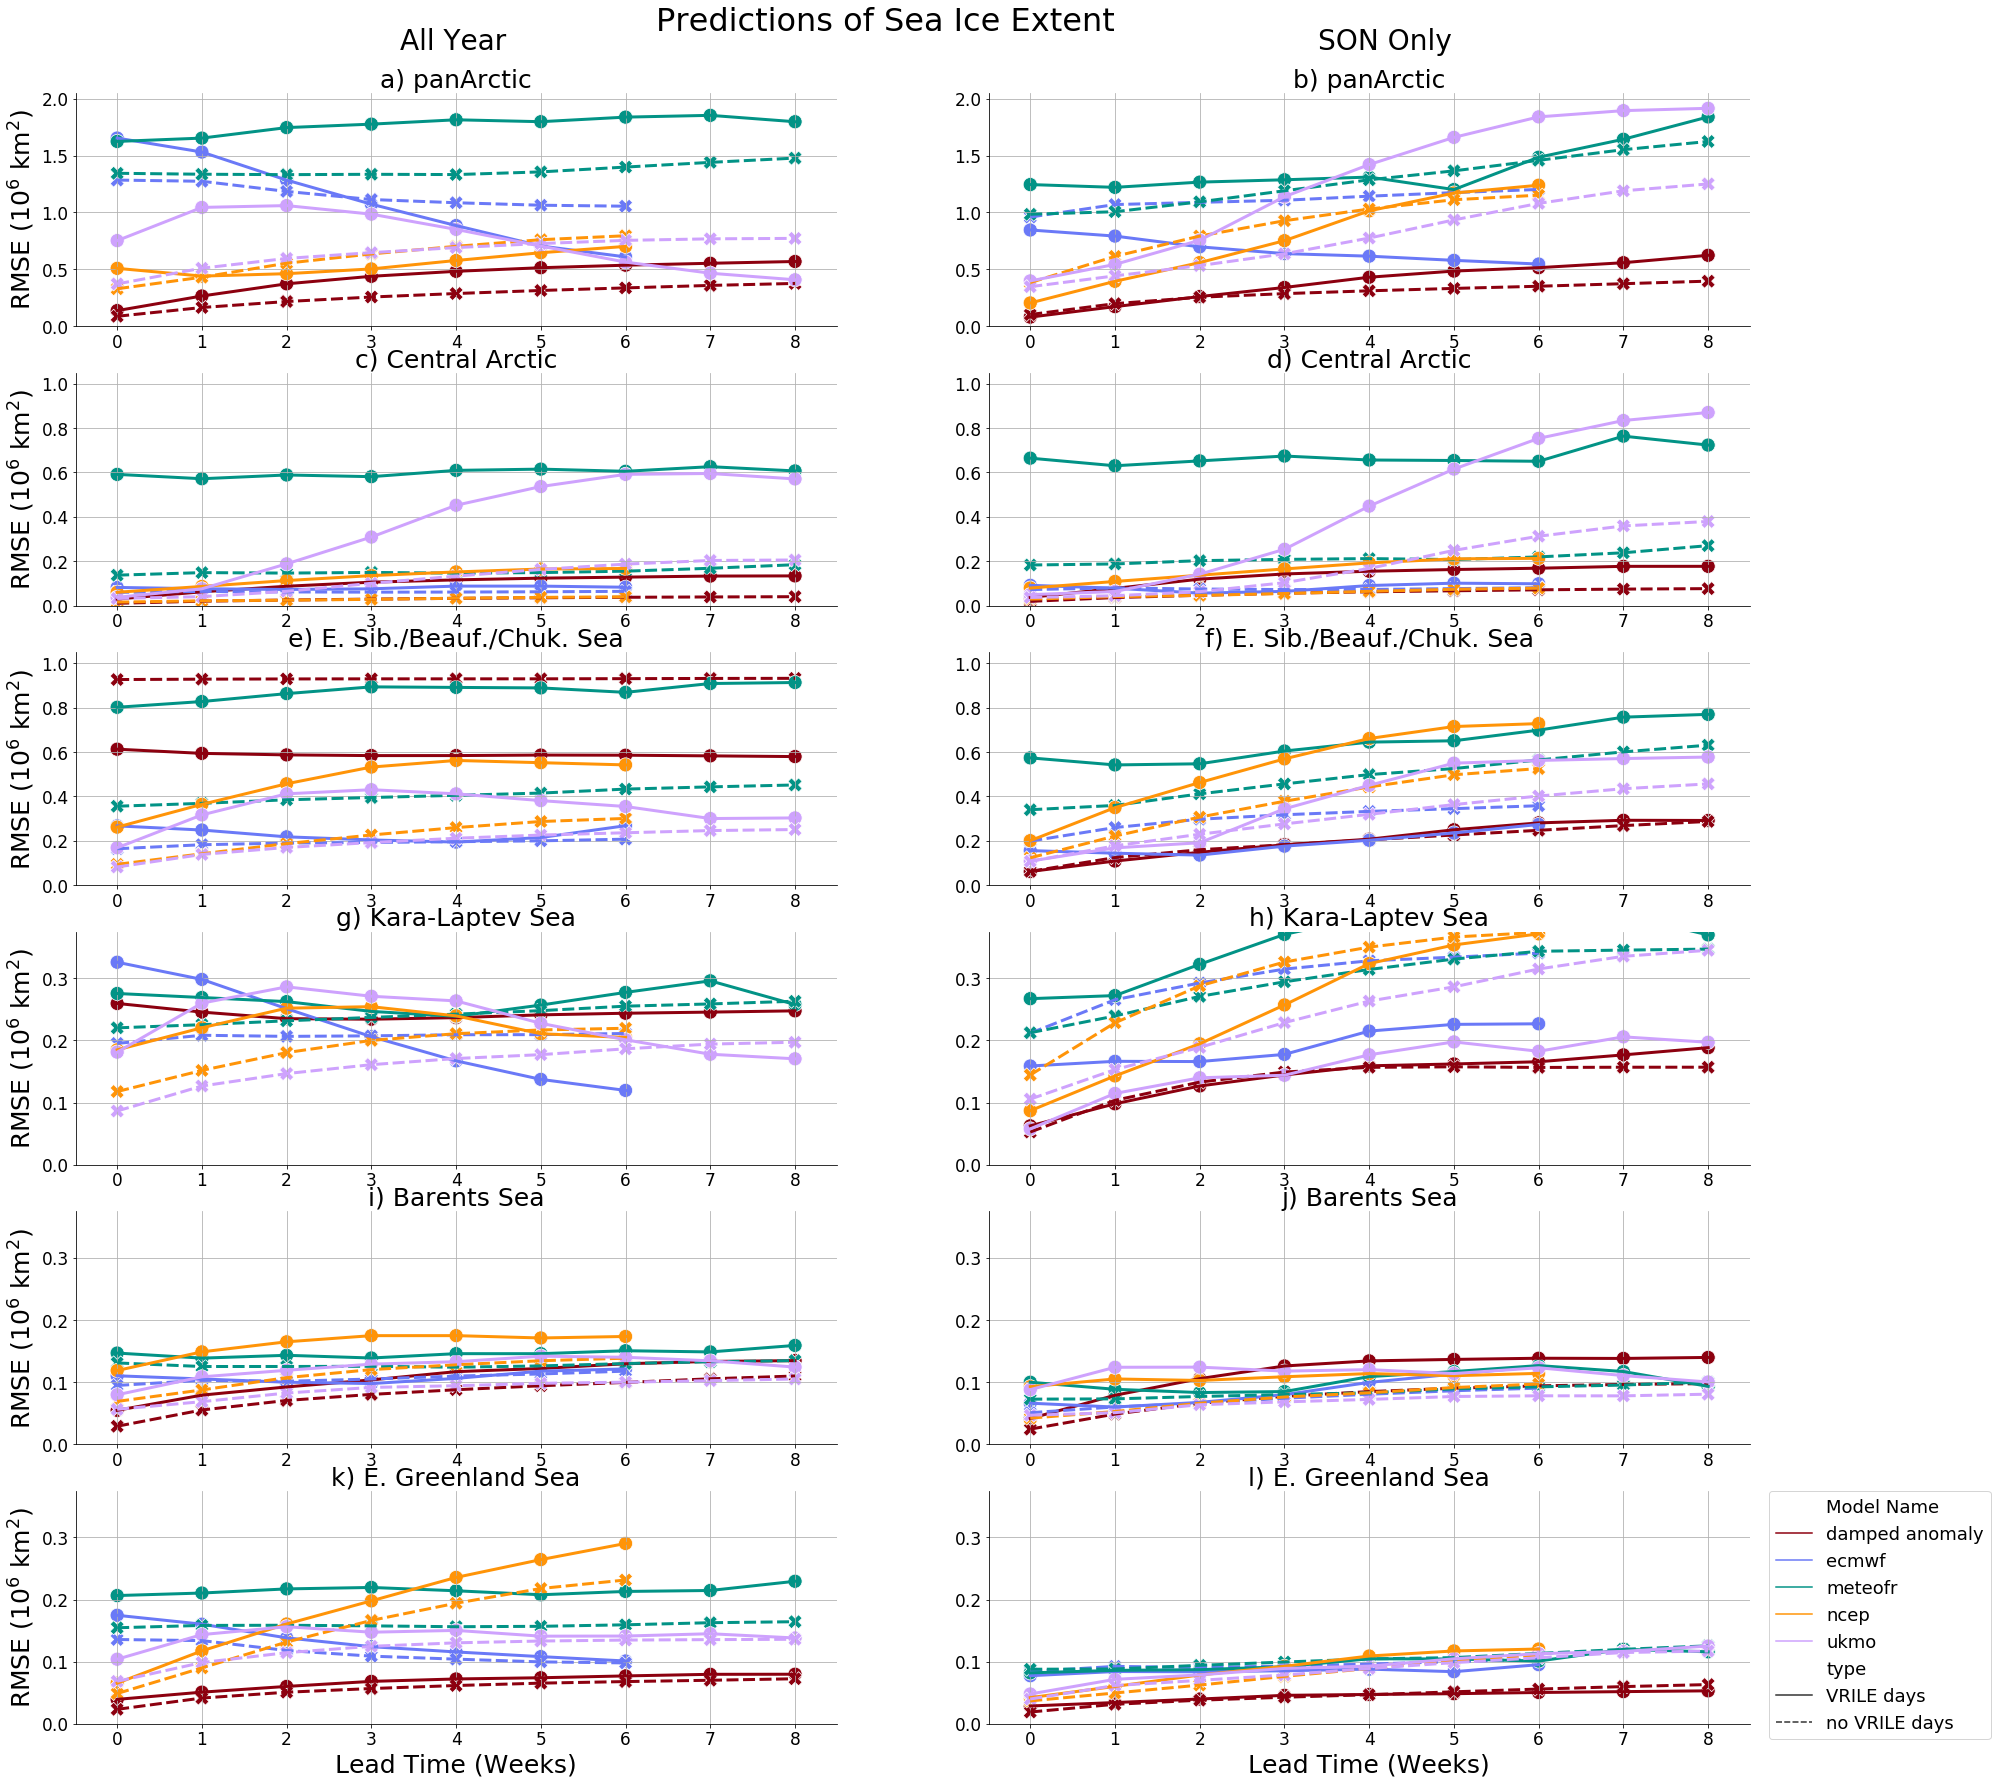

In [11]:
nrows = 6
no_regions = len(regions_sort)
if TO_PLOT == 'SIE RMSE':
    vmax = [2.05,1.05,1.05,0.375,0.375,0.375]
else:
    vmax = [2.05/2,1.5/2,1.05/2,0.375,0.375/2,0.375/2]
vmin = 0
fig1,ax1 = plt.subplots(nrows,ncols,figsize=(30,30))
for i in range(0,2*no_regions):
    ax_sel = ax1.flat[i]
    i_reg = np.floor(i/2).astype(int)
    reg_sel = regions_sort[i_reg]
    if np.mod(i,2) == 0:
        data_sel = d_SIE_all_gb.xs((reg_sel)).reset_index()
    elif np.mod(i,2) == 1:
        data_sel = d_SIE_all_gb2.xs((reg_sel)).reset_index()
    # Plot
    RMSE_plot(ax_sel,data_sel,reg_sel,TO_PLOT,i,vmin,vmax[i_reg])
#fig1.tight_layout()
if TO_PLOT == 'SIE RMSE':
    fig1.suptitle('Predictions of Sea Ice Extent',fontsize=32,y=0.92)
else:
    fig1.suptitle('Predictions of Anomalous Sea Ice Extent',fontsize=32,y=0.92)
fig1.text(0.275,0.9,'All Year',fontsize=28)
fig1.text(0.7,0.9,'{seas_str} Only'.format(seas_str=seas_str2),fontsize=28)
fpath_save1 = '/home/disk/sipn/mcmcgraw/McGraw_etal_2020/code/make_it_nice/figures/{save_str}_ALL_vs_{seas_str}_RMSE_obs_{obs_name}.pdf'.format(save_str=save_str,
                                                                                                                               seas_str=seas_str2,obs_name=obs_name)
fig1.savefig(fpath_save1,format='pdf',bbox_inches='tight')

In [12]:
ratios = d_SIE_all_gb.xs('VRILE days',level=2).divide(d_SIE_all_gb.xs('no VRILE days',level=2))
ratios_seas2 = d_SIE_all_gb2.xs('VRILE days',level=2).divide(d_SIE_all_gb2.xs('no VRILE days',level=2))

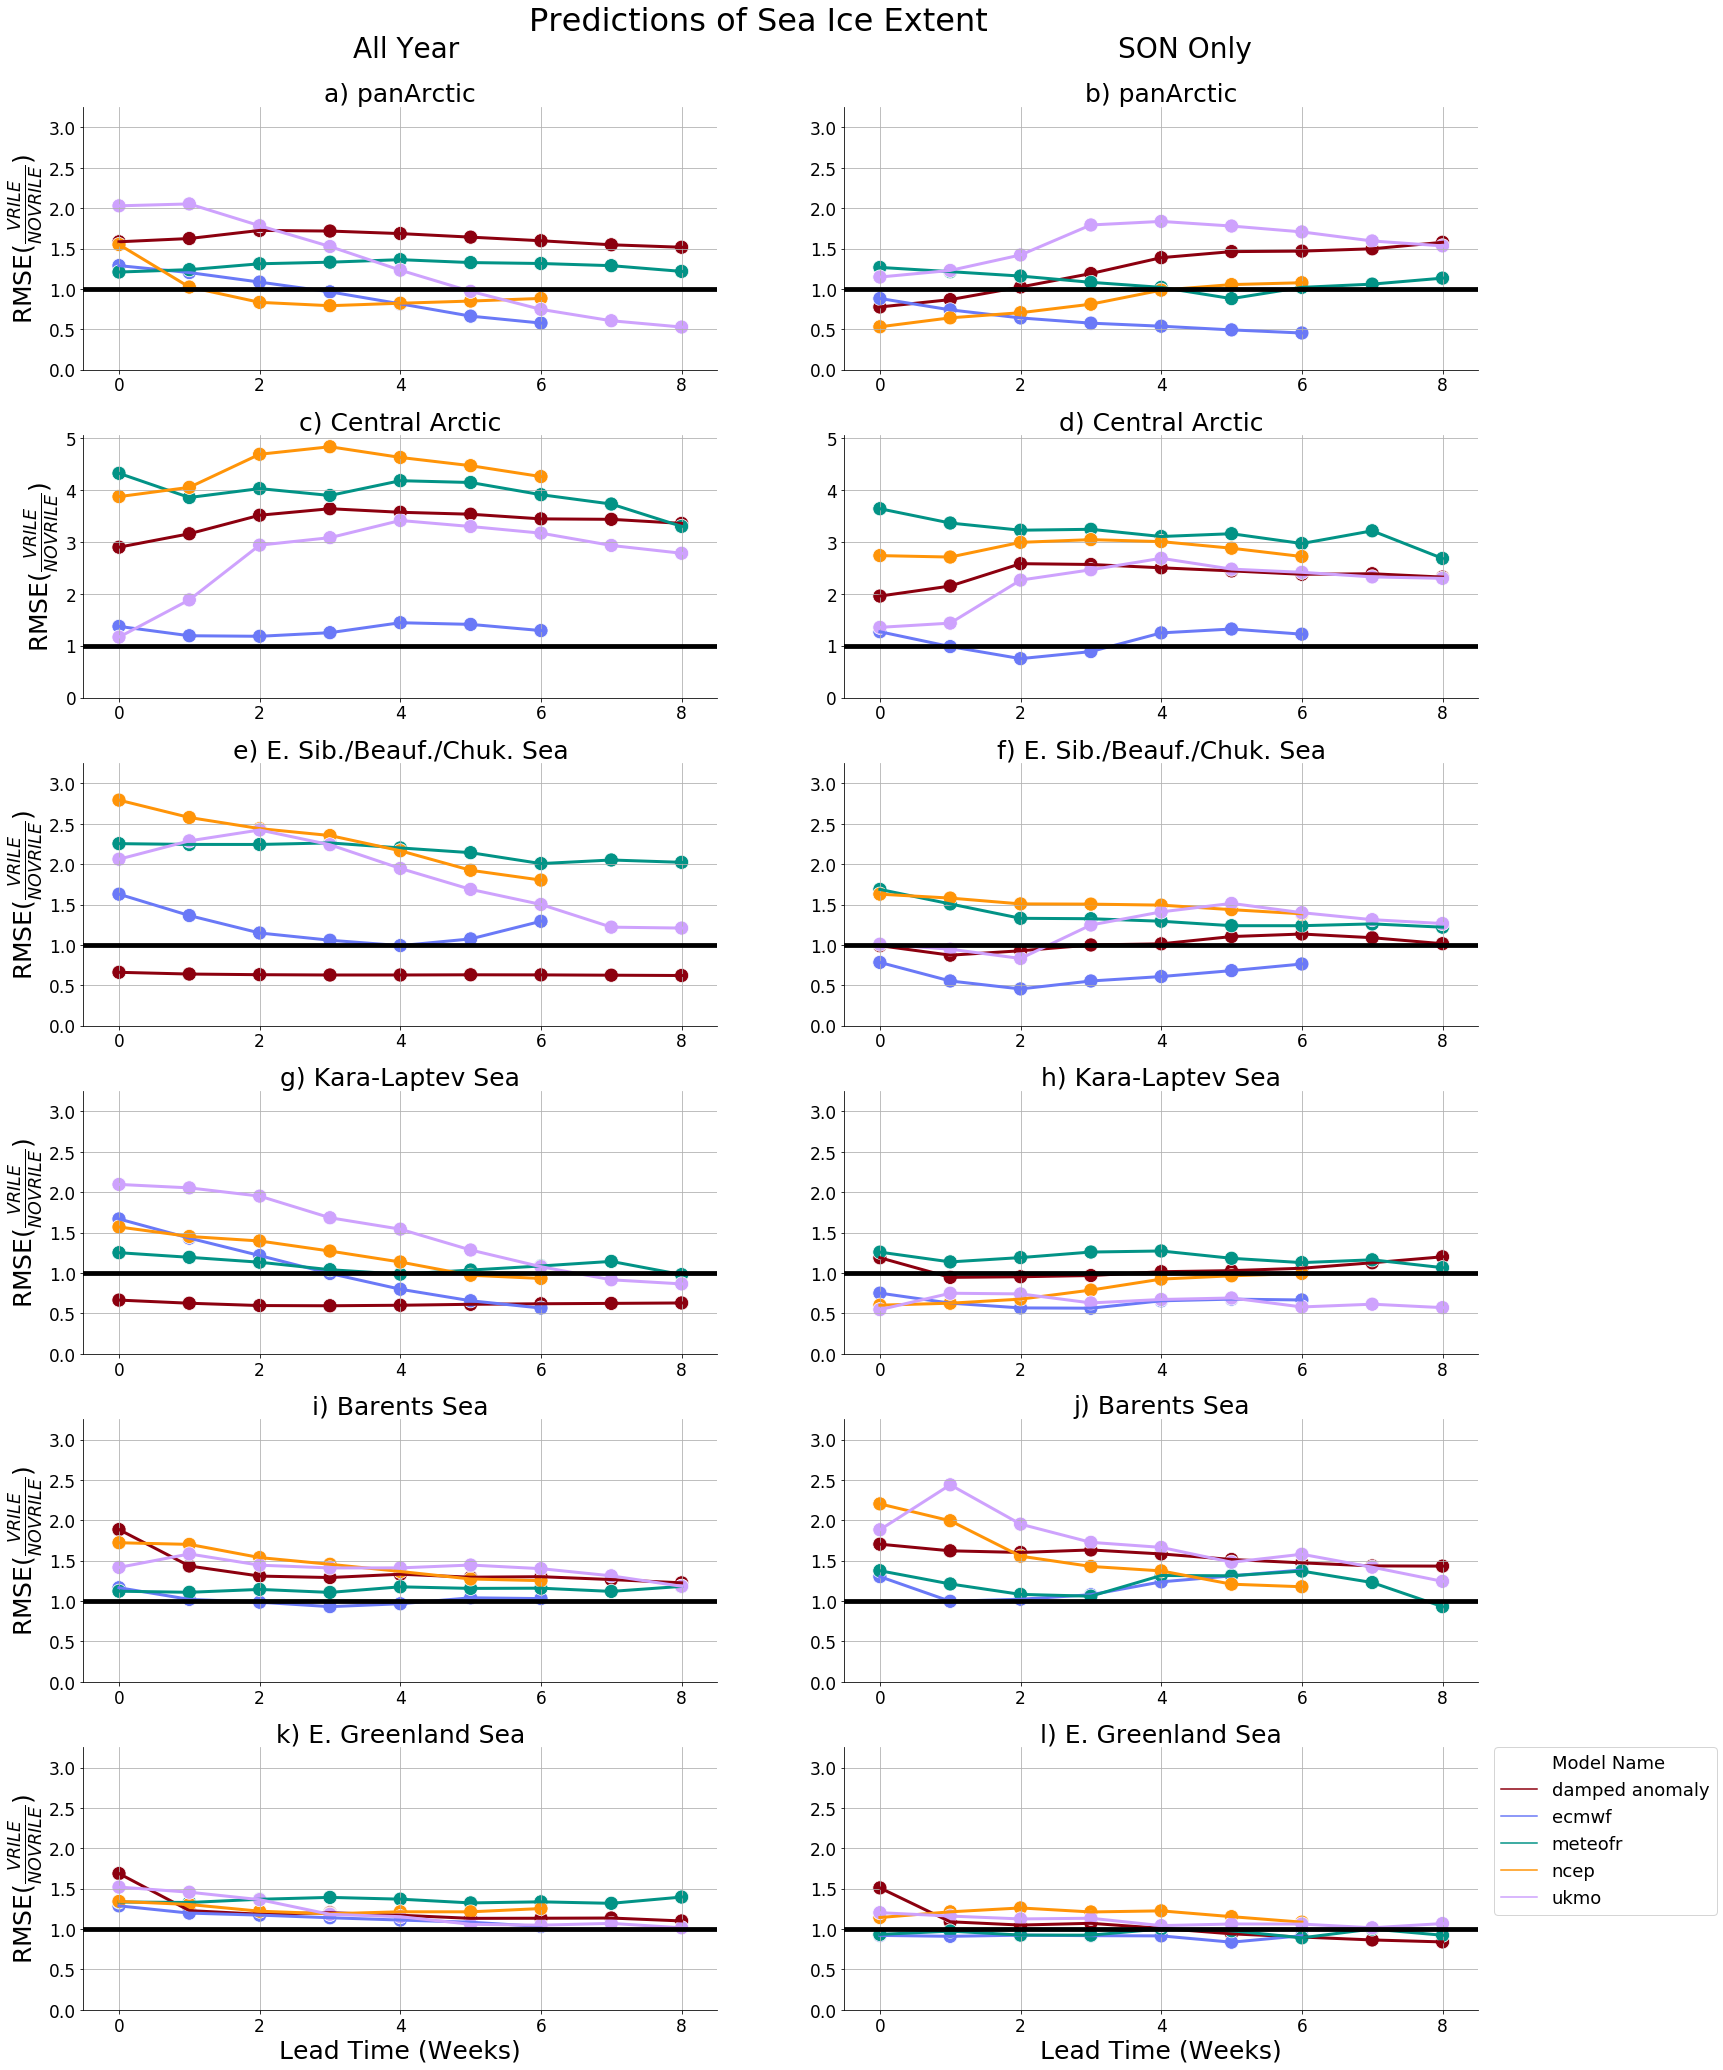

In [13]:
fig2,ax2 = plt.subplots(nrows,ncols,figsize=(25,35))
for i in range(0,2*no_regions):
    ax_sel = ax2.flat[i]
    i_reg = np.floor(i/2).astype(int)
    reg_sel = regions_sort[i_reg]
    if np.mod(i,2) == 0:
        data_sel = ratios.xs((reg_sel)).reset_index()
    elif np.mod(i,2) == 1:
        data_sel = ratios_seas2.xs((reg_sel)).reset_index()
    # Plot
    if (TO_PLOT == 'SIE anom RMSE') & ((reg_sel == 'Central Arctic') | (reg_sel == 'E. Sib./Beauf./Chuk. Sea')):
        v_max = 3.25
    elif TO_PLOT == 'SIE anom RMSE':
        v_max = 3.25
    elif (TO_PLOT == 'SIE RMSE') & (reg_sel == 'Central Arctic'):
        v_max = 5.05
    elif (TO_PLOT == 'SIE RMSE'):
        v_max = 3.25
    RMSE_ratio_plot(ax_sel,data_sel,reg_sel,TO_PLOT,i,vmin,v_max)
# 
#fig2.tight_layout()
if TO_PLOT == 'SIE RMSE':
    fig2.suptitle('Predictions of Sea Ice Extent',fontsize=32,y=0.92)
else:
    fig2.suptitle('Predictions of Anomalous Sea Ice Extent',fontsize=32,y=0.92)
fig2.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.25)

fig2.text(0.275,0.9,'All Year',fontsize=28)
fig2.text(0.7,0.9,'{seas_str} Only'.format(seas_str=seas_str2),fontsize=28)
fpath_save2 = '/home/disk/sipn/mcmcgraw/McGraw_etal_2020/code/make_it_nice/figures/{save_str}_ALL_vs_{seas_str}_RATIOS_with_obs_{obs_name}.pdf'.format(save_str=save_str,
                                                                                                                               seas_str=seas_str2,obs_name=obs_name)

fig2.savefig(fpath_save2,format='pdf',bbox_inches='tight')